In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.colors import LogNorm
!pip install skmatter
from skmatter.decomposition import KernelPCovR
from sklearn.kernel_ridge import KernelRidge

In [5]:
df=pd.read_csv('data_with_features3.csv', index_col=0)
df.describe()

,k2,K1,rAC,rcat,kg(473K),kg(673K),kg(873K),pg(473K),pg(673K),pg(873K),...,O_theta_plus,O_theta_minus,O_torsion,O_len_plus,O_len_minus,center_torsion_plus,center_torsion_minus,center_theta,center_r_plus,center_r_minus
count,3.880000e+02,388.000000,3.880000e+02,3.880000e+02,3.880000e+02,3.880000e+02,3.880000e+02,3.880000e+02,3.880000e+02,388.000000,...,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,1.934044e+07,37.930356,8.957118e+05,4.660473e+05,1.976712e+01,6.091037e+04,5.337219e+06,8.494813e-01,9.643840e-01,0.985403,...,1.159460,-0.294816,0.334928,6.589221,1.218686,6.170842,0.112343,-0.001623,5.602961,-2.190889
std,1.814001e+08,466.250015,8.974441e+06,4.002405e+06,2.699537e+01,7.192393e+04,5.722334e+06,3.421645e-01,1.783563e-01,0.115112,...,0.206936,0.110820,0.278017,0.267300,0.274504,0.084440,0.084440,0.361102,0.273405,0.273112
min,2.085212e+02,0.000515,8.443474e+00,8.443473e+00,6.280091e-26,1.124714e-14,1.498201e-08,2.260833e-22,4.048969e-11,0.000054,...,0.445213,-0.704083,0.000125,5.729021,-0.089130,5.706389,0.000537,-1.084169,4.441787,-2.747128
25%,4.391391e+03,0.205611,1.619639e+03,1.619606e+03,5.391173e-02,1.136852e+03,2.734745e+05,1.000000e+00,1.000000e+00,1.000000,...,1.031640,-0.356213,0.107791,6.420212,1.088161,6.126738,0.046688,-0.231350,5.476827,-2.391881
50%,8.521477e+03,0.920636,3.730133e+03,3.729963e+03,9.948799e+00,4.318654e+04,4.439660e+06,1.000000e+00,1.000000e+00,1.000000,...,1.165774,-0.297583,0.287133,6.599790,1.256094,6.184990,0.098195,0.002767,5.631776,-2.229344
75%,2.941931e+04,4.628069,9.654834e+03,9.653691e+03,3.210362e+01,1.006620e+05,8.552737e+06,1.000000e+00,1.000000e+00,1.000000,...,1.285075,-0.230452,0.480131,6.780196,1.411727,6.236498,0.156447,0.221995,5.796748,-2.049366
max,2.049141e+09,6803.463000,1.459160e+08,5.233622e+07,2.206009e+02,5.705925e+05,4.440641e+07,1.000000e+00,1.000000e+00,1.000000,...,1.732171,0.090592,1.765573,7.232123,1.760950,6.282649,0.576796,1.020415,6.237963,-1.149393


In [6]:
df_clean=df.loc[:, ['rcat', 'Fa_theta_plus', 'Fa_theta_minus', 'Fa_torsion', 'Fa_len_plus', 'Fa_len_minus', 'Fb_theta_plus', 'Fb_theta_minus', 'Fb_torsion', 'Fb_len_plus', 'Fb_len_minus', 'O_theta_plus', 'O_theta_minus', 'O_torsion', 'O_len_plus', 'O_len_minus', 'center_torsion_plus', 'center_torsion_minus', 'center_theta', 'center_r_plus', 'center_r_minus']]
df_clean.drop_duplicates(inplace=True)
df_clean.dropna(inplace=True)
df_clean.reset_index(inplace=True, drop=True)

df_clean.describe()

,rcat,Fa_theta_plus,Fa_theta_minus,Fa_torsion,Fa_len_plus,Fa_len_minus,Fb_theta_plus,Fb_theta_minus,Fb_torsion,Fb_len_plus,...,O_theta_plus,O_theta_minus,O_torsion,O_len_plus,O_len_minus,center_torsion_plus,center_torsion_minus,center_theta,center_r_plus,center_r_minus
count,3.880000e+02,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,...,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,4.660473e+05,3.242064,0.002417,0.331826,5.402360,-0.008518,3.231590,-0.003647,0.325094,5.409731,...,1.159460,-0.294816,0.334928,6.589221,1.218686,6.170842,0.112343,-0.001623,5.602961,-2.190889
std,4.002405e+06,0.356191,0.228150,0.276103,0.100454,0.109390,0.301698,0.235955,0.259557,0.109277,...,0.206936,0.110820,0.278017,0.267300,0.274504,0.084440,0.084440,0.361102,0.273405,0.273112
min,8.443473e+00,1.922890,-1.141469,0.002195,5.125692,-0.302136,2.332520,-0.929865,0.002463,5.063853,...,0.445213,-0.704083,0.000125,5.729021,-0.089130,5.706389,0.000537,-1.084169,4.441787,-2.747128
25%,1.619606e+03,3.013739,-0.108488,0.116146,5.333331,-0.084598,3.046770,-0.124688,0.108833,5.336099,...,1.031640,-0.356213,0.107791,6.420212,1.088161,6.126738,0.046688,-0.231350,5.476827,-2.391881
50%,3.729963e+03,3.244393,0.012729,0.263736,5.405526,-0.010349,3.216428,-0.016826,0.266466,5.408459,...,1.165774,-0.297583,0.287133,6.599790,1.256094,6.184990,0.098195,0.002767,5.631776,-2.229344
75%,9.653691e+03,3.483358,0.123267,0.467335,5.472923,0.061239,3.447155,0.124485,0.471726,5.481269,...,1.285075,-0.230452,0.480131,6.780196,1.411727,6.236498,0.156447,0.221995,5.796748,-2.049366
max,5.233622e+07,4.196962,1.007625,1.461064,5.650397,0.336459,4.076825,0.965987,1.302962,5.720499,...,1.732171,0.090592,1.765573,7.232123,1.760950,6.282649,0.576796,1.020415,6.237963,-1.149393


In [7]:
feature_cols=['Fa_theta_plus', 'Fa_theta_minus', 'Fa_torsion', 'Fa_len_plus', 'Fa_len_minus', 'Fb_theta_plus', 'Fb_theta_minus', 'Fb_torsion', 'Fb_len_plus', 'Fb_len_minus', 'O_theta_plus', 'O_theta_minus', 'O_torsion', 'O_len_plus', 'O_len_minus', 'center_torsion_plus', 'center_torsion_minus', 'center_theta', 'center_r_plus', 'center_r_minus']
target_col='rcat'

X=df_clean[feature_cols].values
y=df_clean[target_col].values
y_log=np.log10(y)

X_scaler=StandardScaler()
X_scaled=X_scaler.fit_transform(X)
y_scaler=StandardScaler()
y_scaled=y_scaler.fit_transform(y_log.reshape(-1, 1))

PCA:

In [8]:
pca=PCA()
X_pca=pca.fit_transform(X_scaled)
explained_var=np.cumsum(pca.explained_variance_ratio_)

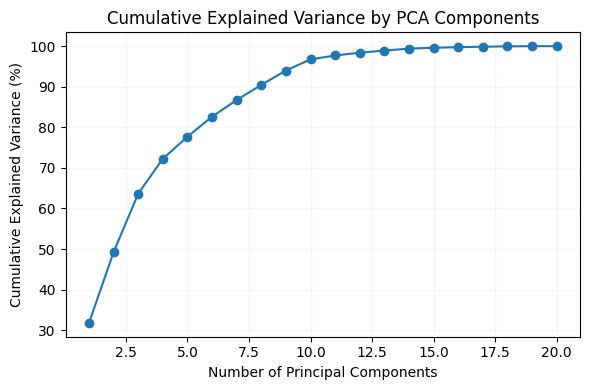

In [9]:
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, len(explained_var)+1), explained_var*100, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()

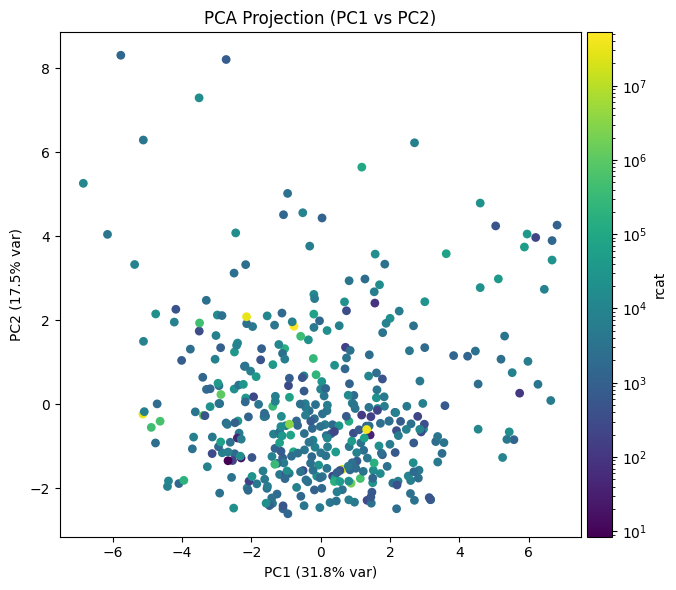

In [10]:
pc1_var=pca.explained_variance_ratio_[0]*100
pc2_var=pca.explained_variance_ratio_[1]*100

plt.figure(figsize=(7, 6))
sc=plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=40, edgecolor='none', norm=LogNorm())
cbar=plt.colorbar(sc, pad=0.01)
cbar.set_label('rcat')

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("PCA Projection (PC1 vs PC2)")
plt.tight_layout()
plt.show()

Kernel PCA:

In [11]:
n_components=len(feature_cols)

kernelpca=KernelPCA(
    n_components=n_components,
    kernel='rbf',
    gamma=1/X_scaled.shape[1],
    fit_inverse_transform=False,
    eigen_solver='auto',
    remove_zero_eig=True)

X_kernelpca=kernelpca.fit_transform(X_scaled)

In [12]:
lambdas=kernelpca.eigenvalues_
lambda_frac=lambdas/np.sum(lambdas)
lambda_cum=np.cumsum(lambda_frac)

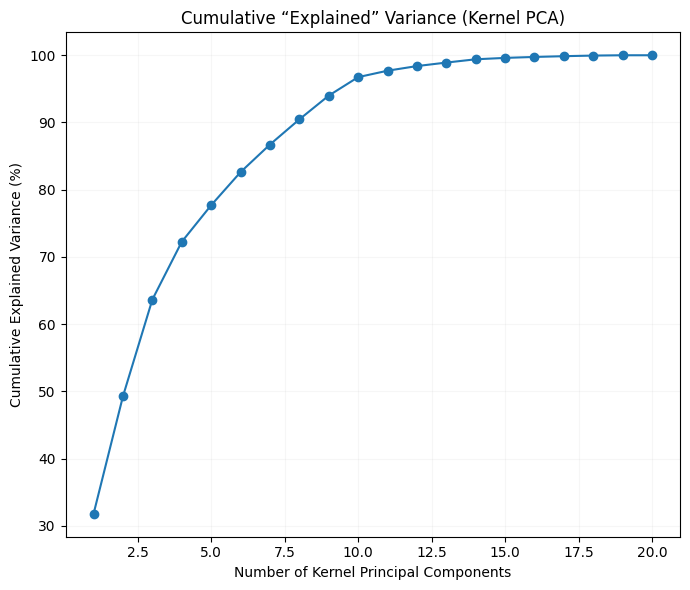

In [13]:
plt.figure(figsize=(7, 6))
plt.plot(np.arange(1, len(explained_var)+1), explained_var*100, marker='o')
plt.xlabel('Number of Kernel Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative “Explained” Variance (Kernel PCA)')
plt.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()

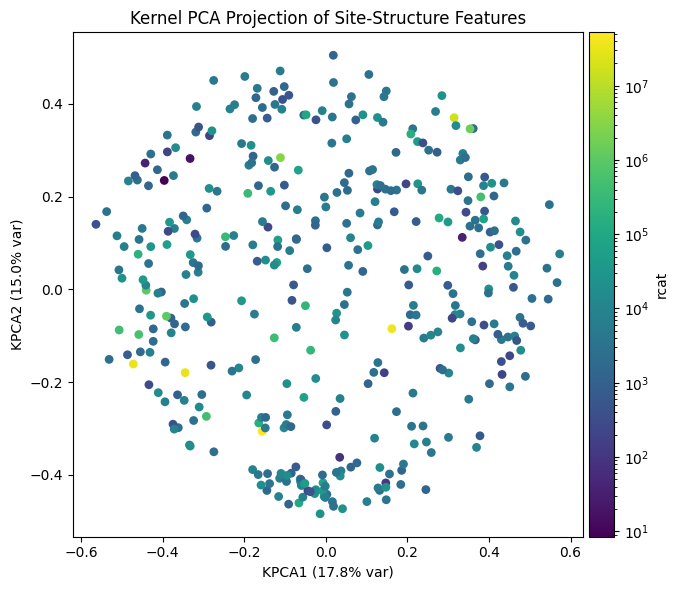

In [14]:
plt.figure(figsize=(7, 6))
sc=plt.scatter(X_kernelpca[:, 0], X_kernelpca[:, 1], c=y, s=40, edgecolor='none', norm=LogNorm())
cbar=plt.colorbar(sc, pad=0.01)
cbar.set_label('rcat')

plt.xlabel(f'KPCA1 ({lambda_frac[0]*100:.1f}% var)')
plt.ylabel(f'KPCA2 ({lambda_frac[1]*100:.1f}% var)')
plt.title('Kernel PCA Projection of Site-Structure Features')
plt.tight_layout()
plt.show()

KPCovR:

In [15]:
n_features=X_scaled.shape[1]
gamma_kpcovr=1/n_features

kernel_params={
    "kernel": "rbf",
    "gamma": gamma_kpcovr}

regressor=KernelRidge(
    alpha=1e-10,
    **kernel_params)

In [16]:
kpcovr=KernelPCovR(
    mixing=0.5,
    n_components=2,
    regressor=regressor,
    **kernel_params)

kpcovr.fit(X_scaled, y_scaled)
T=kpcovr.transform(X_scaled)
y_pred_scaled=kpcovr.predict(X_scaled)
y_pred_log=y_scaler.inverse_transform(y_pred_scaled).ravel()
y_pred=10**y_pred_log

In [17]:
r2=r2_score(y, y_pred)
mse=mean_squared_error(y, y_pred)
print("KPCovR R^2:", round(r2, 3))
print("KPCovR MSE:", round(mse, 3))

KPCovR R^2: 1.0
KPCovR MSE: 5196026028.277


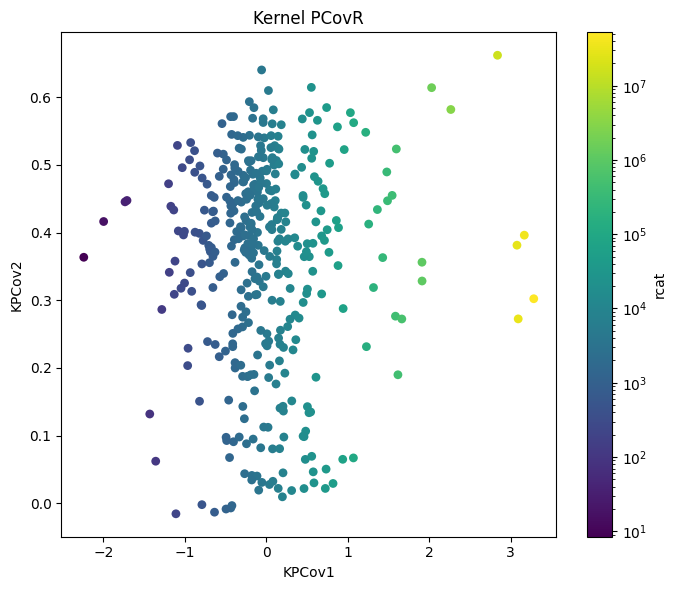

In [18]:
plt.figure(figsize=(7, 6))
sc=plt.scatter(T[:, 0], T[:, 1], c=y, s=40, edgecolor='none', norm=LogNorm())
plt.colorbar(sc, label='rcat')
plt.xlabel("KPCov1")
plt.ylabel("KPCov2")
plt.title("Kernel PCovR")
plt.tight_layout()
plt.show()